In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
# #Importing data
# df = pd.read_csv('train.csv')
# #Printing head
# df.head()

# df = pd.read_csv('bitcoin_price.csv', parse_dates=['Date'])
# df=df.iloc[::-1]
# print(df.head())
# df.index = df['Date']
# del df['Date']
# df.info()

# df = df[['Close']]
# print(df.head())

# df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
# df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
# # df = df[['Close', 'HL_PCT', 'PCT_change']]
# df = df[['Close']]
# print(df.tail())

In [98]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv')
df.isnull().values.any()
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
5,1325318220,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
6,1325318280,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
7,1325318340,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
8,1325318400,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
9,1325318460,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [116]:
# df['Date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
df['Date'] = pd.to_datetime(df['Timestamp'],unit='s')
# group = df.groupby('Date')
# Daily_Price = group['Close'].mean()
# Daily_Price.head()

In [118]:
print(len(df))

3161057


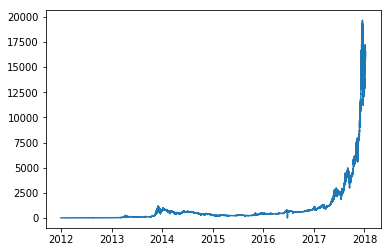

In [124]:
# convert the date column into a time series with daily frequency
df['Date'] = pd.to_datetime(df['Date'])
df1={}
df1['Date']=df['Date']
df1['Close']=df['Close']
indexed_df = df.set_index('Date')
ts = indexed_df['Close']
ts.head()
# visualize the time series to see how Bitcoin changes over time
plt.plot(ts)

In [125]:
# ts_df = df1.resample('D').mean()
# plt.plot(df_day)
# # resamply by week
# ts_day = ts.resample('D').mean()
# plt.plot(ts_day)
# print(len(ts_week))

In [126]:
train=df1[0:2500000] 
test=df1[2500000:]
print(train.tail())
print(test.head())
print(test.tail())

TypeError: unhashable type: 'slice'

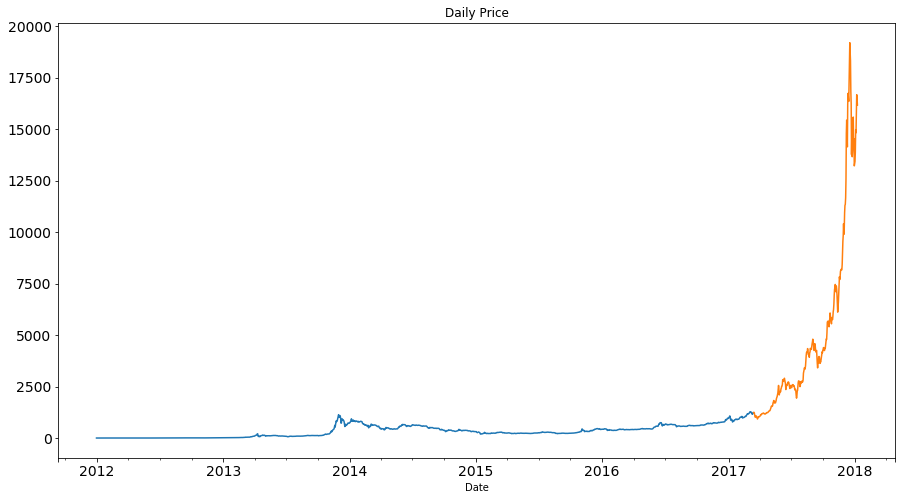

In [88]:
train.Close.plot(figsize=(15,8), title= 'Daily Price', fontsize=14)
test.Close.plot(figsize=(15,8), title= 'Daily Price', fontsize=14)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (302,) and (1,)

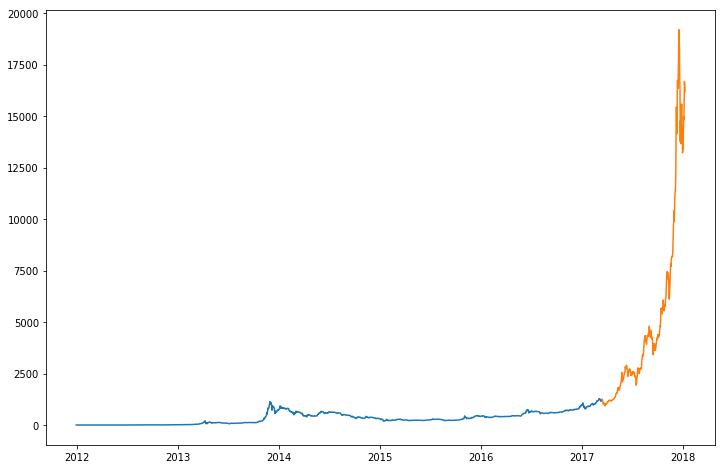

In [91]:
dd= np.asarray(train.Close)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

#ploting Graph between Train test NAIVE Approach for forecast
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index,test['Close'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Close, y_hat.naive))
print(rms)

16238.243634443847


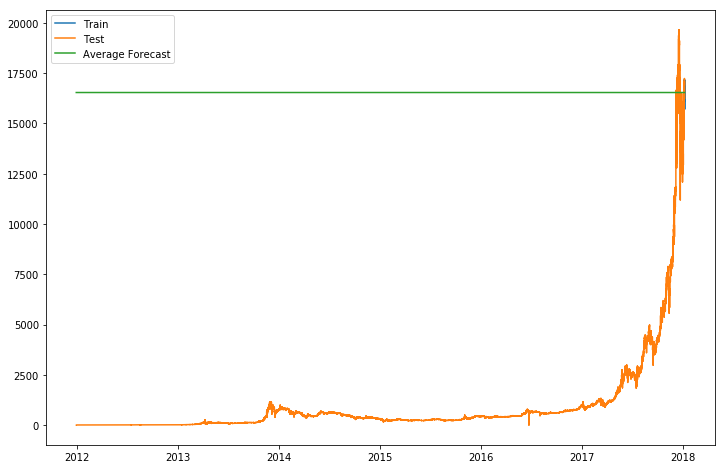

In [10]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Close'].mean()

plt.figure(figsize=(12,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [11]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.avg_forecast))
print(rms)

15743.82530393843


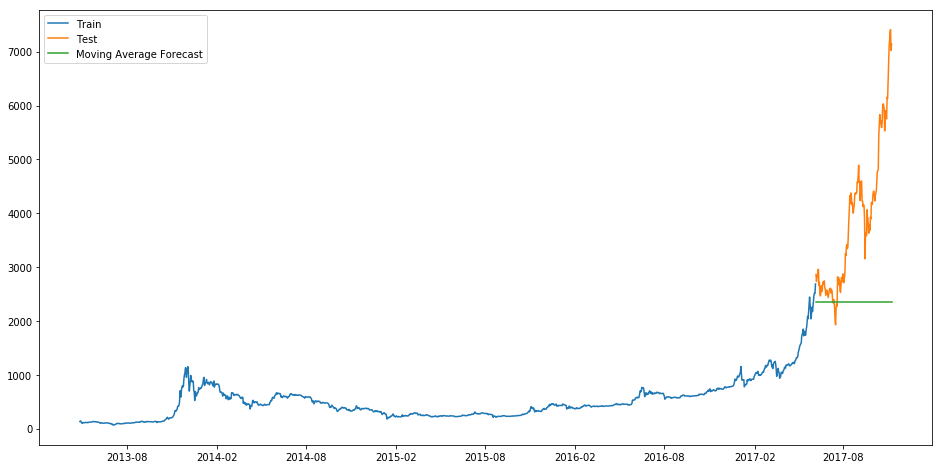

In [34]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Close'].rolling(10).mean().iloc[-1]

plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [35]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.moving_avg_forecast))
print(rms)

2026.4186117619163


In [36]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

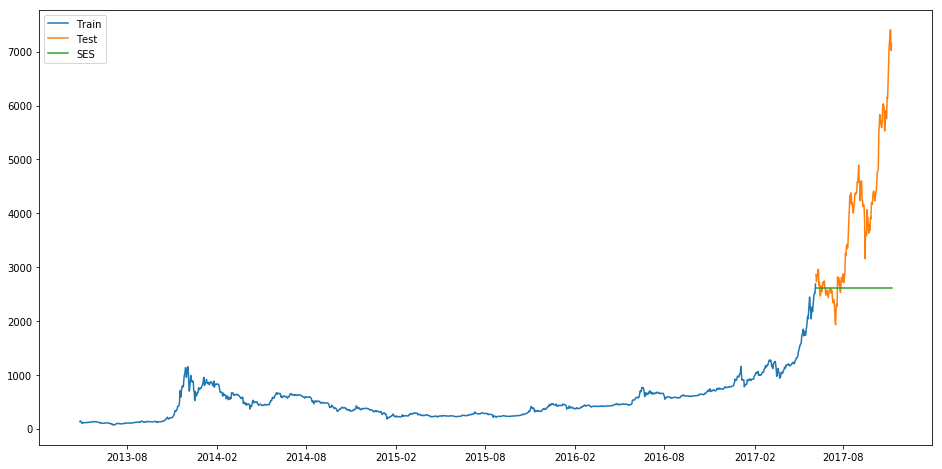

In [37]:
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Close'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [38]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.SES))
print(rms)

1837.0992146655035


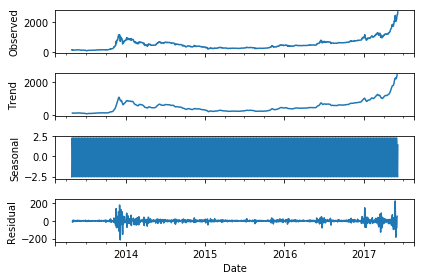

In [39]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Close).plot()
result = sm.tsa.stattools.adfuller(train.Close)
plt.show()

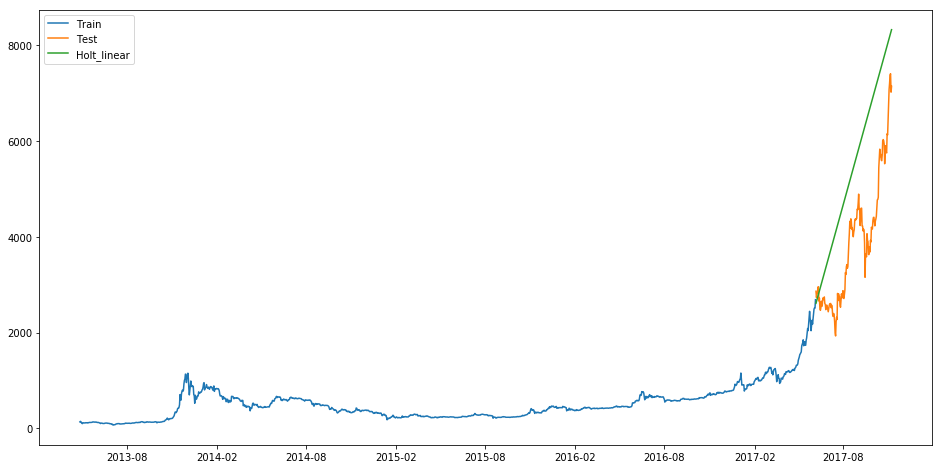

In [40]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Close'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [41]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.Holt_linear))
print(rms)

1754.2470748369246


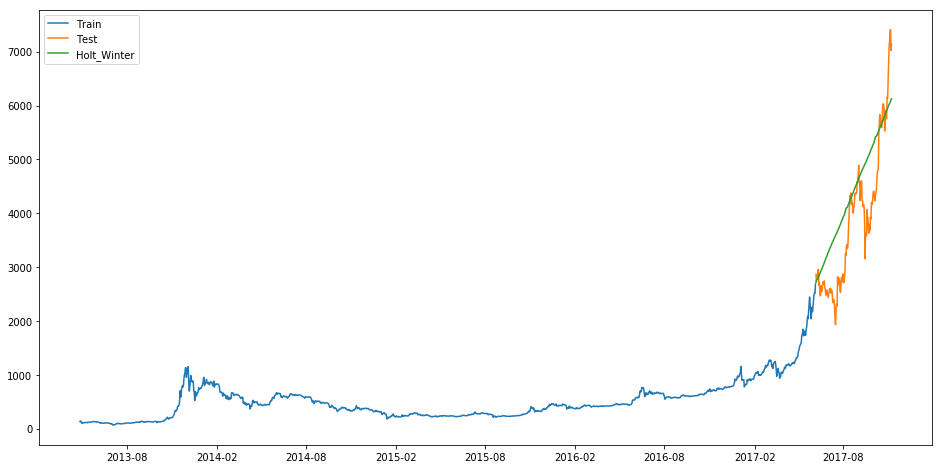

In [42]:
# y_hat_avg = test.copy()
# fit1 = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
# y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=60 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot( train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [43]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.Holt_Winter))
print(rms)

808.3535921056981


In [45]:
# # y_hat_avg = test.copy()
# # fit1 = sm.tsa.statespace.SARIMAX(train.Close, order=(2, 1, 2),seasonal_order=(0,1,1,7)).fit()
# # y_hat_avg['SARIMA'] = fit1.predict(start="2017-06-06", end="2017-11-03", dynamic=True)

# y_hat_avg = test.copy()
# fit1 = sm.tsa.statespace.SARIMAX(train.Close, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
# y_hat_avg['SARIMA'] = fit1.predict(start="2017-06-04", end="2017-11-03", dynamic=True)

# # y_hat_avg = test.copy()
# # fit1 = sm.tsa.statespace.SARIMAX(train.Close, order=(2, 1, 1)).fit()
# # y_hat_avg['SARIMA'] = fit1.predict(start="2017-06-06", end="2017-11-03", dynamic=True)

# # y_hat_avg = test.copy()
# # fit1 = sm.tsa.statespace.SARIMAX(train.Close, order=(2, 1, 2),seasonal_order=(-3,0,1,3)).fit()
# # y_hat_avg['SARIMA'] = fit1.predict(start="2017-06-06", end="2017-11-03", dynamic=True)

# # y_hat_avg = test.copy()
# # fit1 = sm.tsa.statespace.SARIMAX(train.Close, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit(disp=-1)
# # y_hat_avg['SARIMA'] = fit1.predict(start="2017-06-06", end="2017-11-03", dynamic=True)

# plt.figure(figsize=(16,8))
# plt.plot( train['Close'], label='Train')
# plt.plot(test['Close'], label='Test')
# plt.plot(y_hat_avg['SARIMA'], label='SARIMA',linewidth=3)
# plt.legend(loc='best')
# plt.show()

In [46]:
# rms = sqrt(mean_squared_error(test.Close, y_hat_avg.SARIMA))
# print(rms)